In [1]:
include("ultrasoundgeneration.jl")

longcat (generic function with 1 method)

In [2]:
using PyCall
pushfirst!(PyVector(pyimport("sys")."path"), "")
ultrasoundgeneration = pyimport("ultrasoundgeneration")

names = readdir(ultrasoundgeneration.train_volumes_path)[1:30]

30-element Array{String,1}:
 "Pancreas_14.nrrd"
 "Pancreas_15.nrrd"
 "Pancreas_16.nrrd"
 "Pancreas_17.nrrd"
 "Pancreas_18.nrrd"
 "Pancreas_19.nrrd"
 "Pancreas_20.nrrd"
 "Pancreas_21.nrrd"
 "Pancreas_22.nrrd"
 "Pancreas_23.nrrd"
 "Pancreas_24.nrrd"
 "Pancreas_25.nrrd"
 "Pancreas_26.nrrd"
 ⋮                 
 "Pancreas_32.nrrd"
 "Pancreas_33.nrrd"
 "Pancreas_34.nrrd"
 "Pancreas_35.nrrd"
 "Pancreas_36.nrrd"
 "Pancreas_37.nrrd"
 "Pancreas_38.nrrd"
 "Pancreas_39.nrrd"
 "Pancreas_40.nrrd"
 "Pancreas_41.nrrd"
 "Pancreas_42.nrrd"
 "Pancreas_43.nrrd"

In [3]:
struct AnnotatedImage
    image::ItkImage
    annotation::Array{Array{Float64,1},1}
end


annotated_images = Array{AnnotatedImage, 1}()
for name = names
    print(name)
    image, annotation = ultrasoundgeneration.load_image_annotation(
        name, ultrasoundgeneration.train_volumes_path)
    jimage = ItkImage(image)
    push!(annotated_images, AnnotatedImage(jimage, annotation))
end

Pancreas_14.nrrdPancreas_15.nrrdPancreas_16.nrrdPancreas_17.nrrdPancreas_18.nrrdPancreas_19.nrrdPancreas_20.nrrdPancreas_21.nrrdPancreas_22.nrrdPancreas_23.nrrdPancreas_24.nrrdPancreas_25.nrrdPancreas_26.nrrdPancreas_27.nrrdPancreas_28.nrrdPancreas_29.nrrdPancreas_30.nrrdPancreas_31.nrrdPancreas_32.nrrdPancreas_33.nrrdPancreas_34.nrrdPancreas_35.nrrdPancreas_36.nrrdPancreas_37.nrrdPancreas_38.nrrdPancreas_39.nrrdPancreas_40.nrrdPancreas_41.nrrdPancreas_42.nrrdPancreas_43.nrrd

In [4]:
t_annotated_images = Array{AnnotatedImage, 1}()
for name = readdir(ultrasoundgeneration.test_volumes_path)
    print(name)
    image, annotation = ultrasoundgeneration.load_image_annotation(
        name, ultrasoundgeneration.test_volumes_path)
    jimage = ItkImage(image)
    push!(t_annotated_images, AnnotatedImage(jimage, annotation))
end

Pancreas_10.nrrdPancreas_11.nrrdPancreas_12.nrrdPancreas_13.nrrdPancreas_6.nrrdPancreas_7.nrrdPancreas_8.nrrdPancreas_9.nrrd

In [5]:
i = 0

0

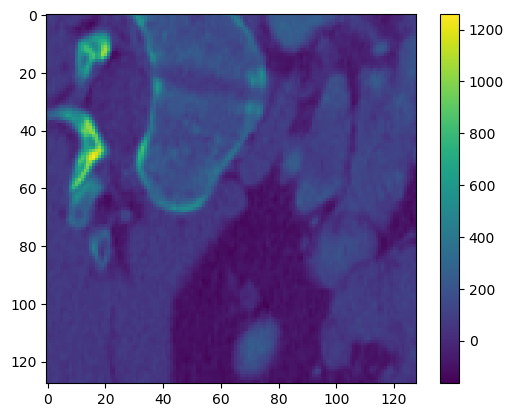

PyObject <matplotlib.colorbar.Colorbar object at 0x7f9b20c90940>

In [6]:
using PyPlot
i += 1
t = generate_sample(annotated_images[i].image, annotated_images[i].annotation)
plt.imshow(t["data"][1])
colorbar()


In [7]:
network_parallel = pyimport("train_network_withangle")


2020-07-05 21:34:19.725435: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2020-07-05 21:34:19.730556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-05 21:34:19.730921: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: GeForce GTX 1080 major: 6 minor: 1 memoryClockRate(GHz): 1.7335
pciBusID: 0000:01:00.0
totalMemory: 7.93GiB freeMemory: 7.06GiB
2020-07-05 21:34:19.730932: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2020-07-05 21:34:20.609604: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-07-05 21:34:20.609639: I tensorflow/core/common_runtime/gpu/gpu_devi

PyObject <module 'train_network_withangle' from '/media/data/hastings/ct-angledslice-align/train_network_withangle.py'>

In [8]:
network_parallel.model.load_weights("models/includeangle2")

2020-07-05 21:34:21.400775: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open models/includeangle2: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
2020-07-05 21:34:21.899215: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2020-07-05 21:34:21.899242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-07-05 21:34:21.899248: I tensorflow/core/common_runtime/gpu/gpu_device.cc:988]      0 
2020-07-05 21:34:21.899251: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1001] 0:   N 
2020-07-05 21:34:21.899361: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 5683 MB memory) -> physical GPU (device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1)


In [9]:
function approx_ultrasound(y)
    y = copy(y)
    #y .+= 1000
    #y[:, :, 1:20,:].= .8
    y *= 2000
    y[y .== 0] .+= 0.001
    
    y[:, :, 1:end - 1, :] .= abs.(1 .- y[:, :, 2:end, :] ./ y[:, :, 1:end - 1, :])
    y[:, :, end, :] .= 0
    #return y
    denominator = cumsum(y, dims=3) .+ 0.01
    #return denominator
    return .5 .+ .1 .* max.(-10, log.(abs.( y ./ 4 .^ denominator .+ 0.0001 .* abs.(randn(size(y))))))
end

approx_ultrasound (generic function with 1 method)

In [10]:
tdata, tclasses = generate_data(
    [x.image for x in t_annotated_images],
    [x.annotation for x in t_annotated_images]
)
@time adata = approx_ultrasound(tdata)

0

  4.038282 seconds (6.19 M allocations: 1.724 GiB, 5.69% gc time)


0

In [11]:
alpha = 1

while true
    data, classes = generate_data(
        [x.image for x in annotated_images], 
        [x.annotation for x in annotated_images]
    )
    
    
    
    data = data .* alpha .+ (1 - alpha) .* approx_ultrasound(data)
    
    
    network_parallel.model.fit(
        [data, classes[:, 4:end]], classes[:, 1:3], batch_size=90, 
        verbose=2, validation_data=((adata, tclasses[:, 4:end]), tclasses[:, 1:3])
    )
    if rand() < .1
        #network_parallel.model.save("models/includeangle3")
    end
    println(alpha)
    if alpha > 0
        alpha -= 0.01
    end
end

whoop
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lamb

2020-07-05 21:35:33.824506: W tensorflow/core/common_runtime/bfc_allocator.cc:211] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.94GiB. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.2604 - val_loss: 9.5730
0.99
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.2871 - val_loss: 10.6168
0.98
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 8s - loss: 0.2373 - val_loss: 11.5235
0.97
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.2996 - val_loss: 11.4584
0.96
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3057 - val_loss: 12.3493
0.95
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3236 - val_loss: 12.8688
0.94
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3978 - val_loss: 9.1308
0.9299999999999999
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3399 - val_loss: 9.9680
0.9199999999999999
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.3398 - val_loss: 9.0161
0.9099999999999999
Train on 2010 samples, validate on 

0.27999999999999936
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.6041 - val_loss: 5.3191
0.26999999999999935
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5650 - val_loss: 5.4017
0.25999999999999934
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5920 - val_loss: 5.5752
0.24999999999999933
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5719 - val_loss: 6.9427
0.23999999999999932
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.6871 - val_loss: 5.1466
0.22999999999999932
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.7981 - val_loss: 5.2776
0.2199999999999993
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.6913 - val_loss: 5.2492
0.2099999999999993
Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.6685 - val_loss: 4.9825
0.1999999999999993
Train on 2010 samples, validate on 536 samples


InterruptException: InterruptException:

In [ ]:


while true
    data, classes = generate_data(
        [x.image for x in annotated_images], 
        [x.annotation for x in annotated_images]
    )
    
    
    
    data = approx_ultrasound(data)
    
    
    network_parallel.model.fit(
        [data, classes[:, 4:end]], classes[:, 1:3], batch_size=90, 
        verbose=2, validation_data=((adata, tclasses[:, 4:end]), tclasses[:, 1:3])
    )
    if rand() < .1
        network_parallel.model.save("models/simulated_includeangle")
    end
    println()
    
end

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.8452 - val_loss: 1.7130

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.8271 - val_loss: 1.7136

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.9469 - val_loss: 1.7327

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.9551 - val_loss: 1.7422

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.7459 - val_loss: 1.7882

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.8166 - val_loss: 1.7347

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.7222 - val_loss: 1.7176

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.9103 - val_loss: 1.7037

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.8279 - val_loss: 1.7061

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.8538 - val_loss: 1.7236

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4340 - val_loss: 1.4626

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5385 - val_loss: 1.4256

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4637 - val_loss: 1.5797

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5896 - val_loss: 1.4595

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4237 - val_loss: 1.4519

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5219 - val_loss: 1.4754

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5791 - val_loss: 1.5166

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5508 - val_loss: 1.5633

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4476 - val_loss: 1.5101

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.5385 - val_loss: 1.4914

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3780 - val_loss: 1.3749

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3426 - val_loss: 1.4530

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4491 - val_loss: 1.3852

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4345 - val_loss: 1.3159

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4486 - val_loss: 1.3389

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4283 - val_loss: 1.3915

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3672 - val_loss: 1.3909

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3222 - val_loss: 1.3893

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3812 - val_loss: 1.3714

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3851 - val_loss: 1.3881

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3333 - val_loss: 1.3467

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4019 - val_loss: 1.2695

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3027 - val_loss: 1.3197

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2203 - val_loss: 1.2898

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2599 - val_loss: 1.2956

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2266 - val_loss: 1.3474

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4005 - val_loss: 1.2991

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2758 - val_loss: 1.2318

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3124 - val_loss: 1.2408

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3514 - val_loss: 1.2742

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3113 - val_loss: 1.2618

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.3035 - val_loss: 1.2802

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2669 - val_loss: 1.2195

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2135 - val_loss: 1.2215

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1936 - val_loss: 1.2677

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1827 - val_loss: 1.1895

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1851 - val_loss: 1.2344

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1610 - val_loss: 1.3120

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.4130 - val_loss: 1.1997

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2232 - val_loss: 1.2121

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2040 - val_loss: 1.1508

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2052 - val_loss: 1.1144

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0684 - val_loss: 1.1130

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1059 - val_loss: 1.1315

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2544 - val_loss: 1.1475

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.2167 - val_loss: 1.1543

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1981 - val_loss: 1.1715

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1315 - val_loss: 1.2279

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1713 - val_loss: 1.1040

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1585 - val_loss: 1.2596

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1325 - val_loss: 1.0569

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0930 - val_loss: 1.0829

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1712 - val_loss: 1.1033

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1174 - val_loss: 1.0580

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1860 - val_loss: 1.1350

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1677 - val_loss: 1.0835

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0674 - val_loss: 1.1279

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1958 - val_loss: 1.1201

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1367 - val_loss: 1.1435

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1270 - val_loss: 1.0720

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0172 - val_loss: 1.1514

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0683 - val_loss: 1.1450

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1612 - val_loss: 1.1160

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1136 - val_loss: 1.1085

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9869 - val_loss: 1.1174

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0736 - val_loss: 1.1446

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1049 - val_loss: 1.1306

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0969 - val_loss: 1.1064

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0981 - val_loss: 1.0866

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0662 - val_loss: 1.1374

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0593 - val_loss: 1.1233

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0701 - val_loss: 1.0752

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0258 - val_loss: 1.0363

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0790 - val_loss: 1.0464

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0002 - val_loss: 1.0616

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0309 - val_loss: 1.0630

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0184 - val_loss: 1.0363

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0689 - val_loss: 1.0625

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0512 - val_loss: 1.1814

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1941 - val_loss: 0.9995

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1436 - val_loss: 1.0952

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9876 - val_loss: 1.0456

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9466 - val_loss: 1.0350

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0259 - val_loss: 1.0411

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1440 - val_loss: 1.0150

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0343 - val_loss: 0.9596

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0676 - val_loss: 1.0006

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0306 - val_loss: 0.9989

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0031 - val_loss: 1.0452

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0753 - val_loss: 1.1042

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0331 - val_loss: 1.0533

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0209 - val_loss: 1.0456

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0079 - val_loss: 1.0125

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.1081 - val_loss: 1.0219

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0096 - val_loss: 0.9818

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9420 - val_loss: 1.0024

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9808 - val_loss: 1.0714

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0863 - val_loss: 1.0323

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0452 - val_loss: 1.0838

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9675 - val_loss: 0.9897

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0414 - val_loss: 1.0463

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0423 - val_loss: 1.0457

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0308 - val_loss: 1.0861

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0328 - val_loss: 0.9844

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0628 - val_loss: 1.0318

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9903 - val_loss: 0.9740

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9969 - val_loss: 0.9822

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8971 - val_loss: 0.9967

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9322 - val_loss: 1.0072

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0297 - val_loss: 1.0333

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9422 - val_loss: 0.9763

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8742 - val_loss: 0.9805

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0418 - val_loss: 1.0129

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0779 - val_loss: 1.0524

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0691 - val_loss: 0.9855

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9573 - val_loss: 0.9783

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9301 - val_loss: 1.0223

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9605 - val_loss: 0.9797

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9181 - val_loss: 0.9812

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9794 - val_loss: 0.9696

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9536 - val_loss: 0.9563

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8796 - val_loss: 0.9821

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9252 - val_loss: 0.9980

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9490 - val_loss: 0.9908

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9693 - val_loss: 0.9628

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8919 - val_loss: 0.9422

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9546 - val_loss: 0.9632

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9432 - val_loss: 0.9911

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9292 - val_loss: 0.9806

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8684 - val_loss: 0.9424

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8867 - val_loss: 0.9230

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9826 - val_loss: 0.8796

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9833 - val_loss: 0.8703

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9923 - val_loss: 0.8580

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8584 - val_loss: 0.9000

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9562 - val_loss: 0.8793

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0015 - val_loss: 0.9163

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9824 - val_loss: 1.0068

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8591 - val_loss: 0.8672

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9780 - val_loss: 0.9170

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9249 - val_loss: 1.1453

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0449 - val_loss: 1.0120

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9419 - val_loss: 1.0015

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8589 - val_loss: 1.0025

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9277 - val_loss: 0.9870

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9513 - val_loss: 0.9509

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9875 - val_loss: 0.9334

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9596 - val_loss: 0.8872

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9217 - val_loss: 0.9246

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9831 - val_loss: 0.9411

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9500 - val_loss: 0.9414

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9609 - val_loss: 0.8931

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8708 - val_loss: 0.9522

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9162 - val_loss: 0.8869

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8421 - val_loss: 0.8973

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8454 - val_loss: 0.9592

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7784 - val_loss: 0.8916

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8240 - val_loss: 0.9590

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0066 - val_loss: 0.8918

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9121 - val_loss: 0.9283

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9998 - val_loss: 0.8238

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8346 - val_loss: 0.8412

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8957 - val_loss: 0.9046

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9657 - val_loss: 0.8477

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8662 - val_loss: 0.8674

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9039 - val_loss: 0.8893

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9114 - val_loss: 0.8907

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7967 - val_loss: 0.9107

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8980 - val_loss: 0.8511

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8815 - val_loss: 0.9057

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8143 - val_loss: 0.9042

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8220 - val_loss: 0.8389

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8685 - val_loss: 0.8498

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9000 - val_loss: 0.9431

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9313 - val_loss: 0.9635

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8282 - val_loss: 0.8891

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9025 - val_loss: 0.9105

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8851 - val_loss: 0.8054

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9109 - val_loss: 0.8029

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9298 - val_loss: 0.8514

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9297 - val_loss: 0.9001

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8706 - val_loss: 0.8482

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9474 - val_loss: 0.8473

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9094 - val_loss: 0.8694

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8403 - val_loss: 0.8986

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8026 - val_loss: 0.9318

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8900 - val_loss: 0.9423

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8065 - val_loss: 0.9116

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8768 - val_loss: 0.8726

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9145 - val_loss: 0.8509

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8630 - val_loss: 0.8558

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8503 - val_loss: 0.8739

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8277 - val_loss: 0.8465

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8507 - val_loss: 0.8706

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8420 - val_loss: 0.9208

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7505 - val_loss: 0.8302

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7827 - val_loss: 0.8118

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8242 - val_loss: 0.8117

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7622 - val_loss: 0.8031

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8264 - val_loss: 0.8256

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8787 - val_loss: 0.8460

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8172 - val_loss: 0.8160

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8202 - val_loss: 0.7923

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7981 - val_loss: 0.8401

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7751 - val_loss: 0.8561

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7806 - val_loss: 0.8426

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8406 - val_loss: 0.8815

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8206 - val_loss: 0.8647

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8641 - val_loss: 0.8869

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8019 - val_loss: 0.9119

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8415 - val_loss: 0.8722

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8311 - val_loss: 0.9323

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8762 - val_loss: 0.8755

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8050 - val_loss: 0.9299

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7963 - val_loss: 0.8784

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9799 - val_loss: 0.9007

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8371 - val_loss: 0.9151

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8745 - val_loss: 0.9278

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8991 - val_loss: 0.8941

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9115 - val_loss: 0.9022

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8635 - val_loss: 0.8782

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7946 - val_loss: 0.7844

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7842 - val_loss: 0.8599

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8078 - val_loss: 0.8164

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8599 - val_loss: 0.7610

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7846 - val_loss: 0.7943

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.8381 - val_loss: 0.8727

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8461 - val_loss: 0.8186

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 8s - loss: 0.8499 - val_loss: 0.8292

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 8s - loss: 0.8490 - val_loss: 0.7920

Train on 2010 sampl

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7513 - val_loss: 0.8062

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7812 - val_loss: 0.7754

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9164 - val_loss: 0.8305

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7343 - val_loss: 0.7904

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8677 - val_loss: 0.8025

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7571 - val_loss: 0.8340

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7472 - val_loss: 0.8498

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7303 - val_loss: 0.8603

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8751 - val_loss: 0.8541

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 1.0025 - val_loss: 0.8904

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8201 - val_loss: 0.8700

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8714 - val_loss: 0.9302

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8920 - val_loss: 0.9640

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7748 - val_loss: 0.8948

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9175 - val_loss: 0.9086

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8134 - val_loss: 0.8757

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8458 - val_loss: 0.8556

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7677 - val_loss: 0.8589

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8011 - val_loss: 0.8466

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8302 - val_loss: 0.8725

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7930 - val_loss: 0.7887

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8561 - val_loss: 0.7888

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8298 - val_loss: 0.7801

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7693 - val_loss: 0.8130

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7963 - val_loss: 0.8465

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8464 - val_loss: 0.8109

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7841 - val_loss: 0.8067

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8186 - val_loss: 0.8299

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7047 - val_loss: 0.8411

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7903 - val_loss: 0.8598

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8069 - val_loss: 0.7284

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8306 - val_loss: 0.8210

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8304 - val_loss: 0.7914

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7972 - val_loss: 0.7542

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8400 - val_loss: 0.7343

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8285 - val_loss: 0.7762

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7873 - val_loss: 0.7809

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7685 - val_loss: 0.7727

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.6849 - val_loss: 0.8151

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7465 - val_loss: 0.8317

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.6581 - val_loss: 0.7692

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7526 - val_loss: 0.7726

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8315 - val_loss: 0.8115

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8395 - val_loss: 0.8466

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7359 - val_loss: 0.8214

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7757 - val_loss: 0.8510

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8078 - val_loss: 0.8316

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.9060 - val_loss: 0.8538

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7406 - val_loss: 0.8186

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8261 - val_loss: 0.7963

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.6540 - val_loss: 0.8158

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8724 - val_loss: 0.7844

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.6880 - val_loss: 0.7529

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7494 - val_loss: 0.7747

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7856 - val_loss: 0.7670

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7813 - val_loss: 0.7646

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7824 - val_loss: 0.7645

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7621 - val_loss: 0.8132

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7919 - val_loss: 0.7654

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7759 - val_loss: 0.7890

Train on 2010 sample

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7853 - val_loss: 0.7880

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7958 - val_loss: 0.8249

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7284 - val_loss: 0.7702

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7201 - val_loss: 0.7607

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.8131 - val_loss: 0.8103

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7041 - val_loss: 0.7762

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7605 - val_loss: 0.7441

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7099 - val_loss: 0.7504

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.7229 - val_loss: 0.7923

Train on 2010 samples, validate on 536 samples
Epoch 1/1
 - 7s - loss: 0.6912 - val_loss: 0.8127

Train on 2010 sample

In [10]:
using BenchmarkTools

In [10]:
network_parallel.model.compile(loss=network_parallel.keras.losses.mean_squared_error,
              optimizer=network_parallel.Adam(lr=0.00005))

In [8]:
@time [generate_sample(jimage, annotation) for _ = 1:7000]
0

  2.381736 seconds (5.91 M allocations: 2.022 GiB, 11.93% gc time)


0

In [29]:
@time data, classes = generate_data(
    [x.image for x in annotated_images], 
    [x.annotation for x in annotated_images]
)
0

  6.758438 seconds (1.91 M allocations: 9.626 GiB, 22.73% gc time)


0

In [30]:
data = approx_ultrasound(data)

2010×128×128×4 Array{Float64,4}:
[:, :, 1, 1] =
 -0.50716   -0.457918  -0.395033  …  -0.327691  -0.436531  -0.429076
 -0.391372  -0.517571  -0.435956     -0.482886  -0.558623  -0.575109
 -0.338473  -0.312859  -0.262861     -0.438601  -0.426574  -0.465489
 -0.417475  -0.223918  -0.56097      -0.446492  -0.344591  -0.266858
 -0.627097  -0.528687  -0.404935     -0.341457  -0.33642   -0.33097 
 -0.308515  -0.425467  -0.234054  …  -0.186121  -0.25899   -0.299749
 -0.385615  -0.41951   -0.493435     -0.137869  -0.135412  -0.14504 
 -0.505999  -0.510713  -0.440913     -0.499752  -0.377945  -0.360611
 -0.168209  -0.152718  -0.139673     -0.323503  -0.195882  -0.19309 
 -0.745906  -0.736641  -0.661161     -0.292383  -0.196117  -0.288198
 -0.280192  -0.284081  -0.281055  …  -0.135769  -0.136255  -0.138418
 -0.550852  -0.497206  -0.655048     -0.237126  -0.153855  -0.140656
 -0.354465  -0.419158  -0.432101     -0.266555  -0.255411  -0.245364
  ⋮                               ⋱   ⋮                

In [33]:
predictions = network_parallel.model.predict((data, classes[:, 4:end]))
0

0

In [51]:
predictions = network_parallel.model.predict((tdata, tclasses[:, 4:end]))
0

0

In [52]:
i = 0

0

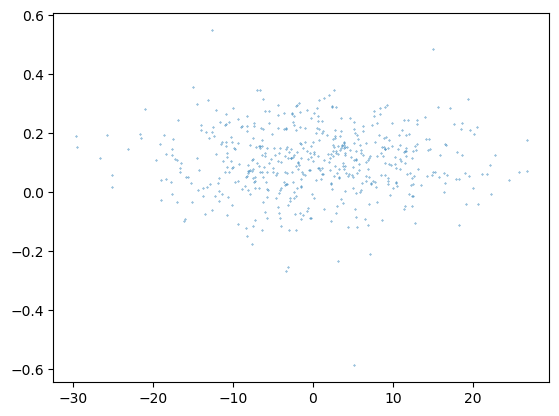

4349.221
4343.191

In [55]:
i += 1
scatter(4 .* tclasses[1:end, i], 4 .* predictions[1:end, i], s= 0.1)
show()
println(4 * sum(abs.(tclasses[1:end, i] .+ predictions[1:end, i])))
print(4 * sum(abs.(tclasses[1:end, i] .- predictions[1:end, i])))

In [31]:
i += 1
scatter(4 .* tclasses[1:end, i], 4 .* predictions[1:end, i], s= 0.1)
show()

print(4 * sum(tclasses[1:end, i] .- predictions[1:end, i]))

BoundsError: BoundsError: attempt to access 536×3 Array{Float32,2} at index [1:536, 4]

In [39]:
sort(reshape(4 .* abs.(tclasses[1:end, 1:3] .- predictions[1:end, :]), (1608)))[Int(round(.95 * 1608))]

2.6752715f0

In [215]:
network_parallel.model.evaluate((tdata, tclasses[:, 4:end]), tclasses[:, 1:3])

536/536 [==============================] - 1s 1ms/step


0.16633889835272261

In [11]:
importlib = pyimport("importlib")

PyObject <module 'importlib' from '/home/hastings/anaconda3/envs/stylegan/lib/python3.6/importlib/__init__.py'>

In [40]:
sort(adata[:])

35127296-element Array{Float64,1}:
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
 -0.5                
  ⋮                  
  0.36602229172068157
  0.3660235070056443 
  0.36602389000737445
  0.3660242280328997 
  0.36602449106517804
  0.36602453163063087
  0.36602844827714276
  0.3660295943967151 
  0.36603019177683815
  0.36603563428147534
  0.36603920827165   
  0.3660474140444886 

In [45]:
image = t_annotated_images[3].image
an = t_annotated_images[3].annotation

2-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 94.3359375, 94.3359375, 95.01953125, 95.01953125, 95.703125, 95.703125, 96.38671875  …  148.33984375, 148.33984375, 149.0234375, 149.0234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                    
 [0.0, 0.0, 0.0, 0.0, 181.8359375, 181.8359375, 181.8359375, 181.8359375, 181.8359375, 181.8359375  …  179.78515625, 179.78515625, 179.78515625, 179.78515625, 179.78515625, 179.78515625, 179.78515625, 179.78515625, 0.0, 0.0]

In [103]:
s = [
    generate_sample_deterministic(
        image, 
        origin_by_height(an, 50), 
        origin_by_height(an, 50 + t), 
        upright, 
        upright
    )
    for t = 0:1:70
]

71-element Array{Dict{String,Array{T,1} where T},1}:
 Dict("classes" => AbstractArray{Float64,N} where N[[0.0, 0.0, 0.0], [1.0 -0.0 0.0; 0.0 1.0 0.0; -0.0 0.0 1.0]],"data" => Array{Float32,2}[[-772.5078 -505.73828 … 155.57031 65.35547; -802.4844 -542.8047 … 185.32812 74.28906; … ; -949.8906 -943.3125 … 92.17578 93.671875; -943.8086 -944.7031 … 89.28906 86.21094], [-478.16406 -397.41406 … -911.73047 -902.0742; -469.53516 -411.32812 … -898.3281 -904.83984; … ; -952.29297 -955.71484 … 57.01953 54.1875; -952.4492 -950.8242 … 59.695312 50.91797], [-772.5078 -505.73828 … 155.57031 65.35547; -802.4844 -542.8047 … 185.32812 74.28906; … ; -949.8906 -943.3125 … 92.17578 93.671875; -943.8086 -944.7031 … 89.28906 86.21094], [-478.16406 -397.41406 … -911.73047 -902.0742; -469.53516 -411.32812 … -898.3281 -904.83984; … ; -952.29297 -955.71484 … 57.01953 54.1875; -952.4492 -950.8242 … 59.695312 50.91797]])                        
 Dict("classes" => AbstractArray{Float64,N} where N[[0.68359375, 1.0, 0

In [104]:
rdata, rclasses = samples_to_dataset(s)
0


0

In [62]:
res = network_parallel.model.predict((rdata, rclasses[:, 4:end]))

71×3 Array{Float32,2}:
 -0.000391883   0.133991  -0.115325 
  0.0874578     0.48656   -0.0317571
  0.107394      0.643636   0.081478 
  0.205104      1.02996    0.107397 
  0.31083       1.07635    0.0781487
  0.311933      1.36565    0.0555796
  0.374223      1.67351    0.0152527
  0.407297      1.88299    0.0465982
  0.490346      2.05943    0.087267 
  0.535437      2.34353    0.135946 
  0.587039      2.65363    0.145041 
  0.666765      2.81481    0.248412 
  0.697193      3.09855    0.303809 
  ⋮                                 
  2.82891       6.91368   -0.508626 
  2.87361       7.72762   -0.49734  
  3.07953       8.35734   -0.402224 
  3.06121       9.20618   -0.254766 
  3.35397       9.90369   -0.110347 
  3.26575      10.5045    -0.214106 
  3.30818      11.0634    -0.367283 
  2.85778      11.3322    -0.0608929
  2.44856      11.286      0.275815 
  2.32815      11.1302     0.450431 
  2.20431      11.0061     0.512612 
  2.13752      10.6762     0.575515 

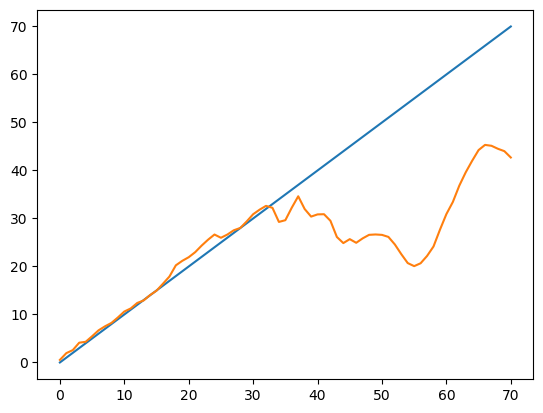

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e79e41f28>

In [63]:
plot(rclasses[:, 2].* 4)
plot(res[:, 2].* 4)

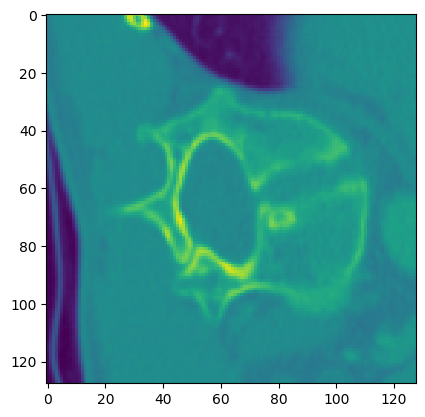

PyObject <matplotlib.image.AxesImage object at 0x7f8e725ed9b0>

In [64]:
imshow(rdata[30, :, :, 4])

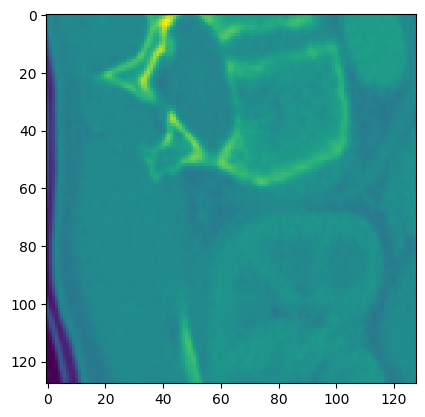

PyObject <matplotlib.image.AxesImage object at 0x7f8e879d42e8>

In [54]:
imshow(rdata[30, :, :, 3])

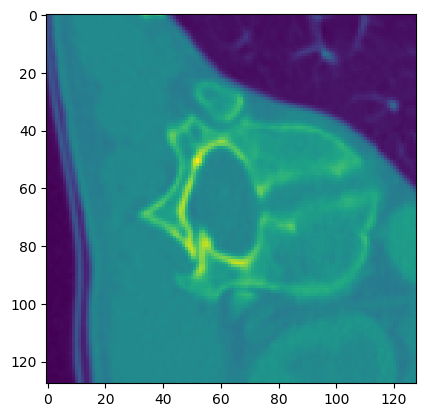

PyObject <matplotlib.image.AxesImage object at 0x7f25036c5f60>

In [205]:
imshow(longcat(rdata)[35, :, :, 2])

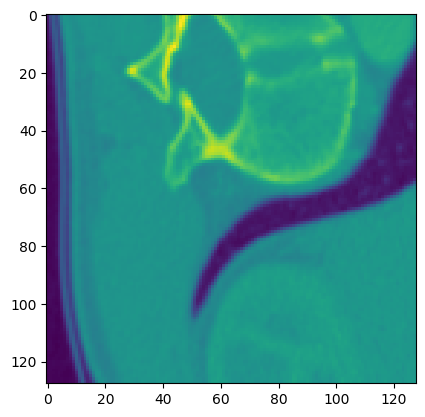

PyObject <matplotlib.image.AxesImage object at 0x7f24e8a48d68>

In [206]:
imshow(longcat(rdata)[35, :, :, 1])

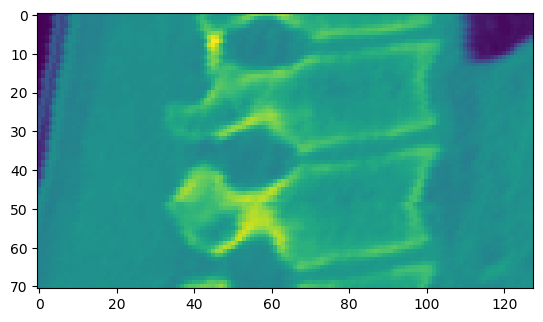

PyObject <matplotlib.image.AxesImage object at 0x7f8e725d1710>

In [65]:
imshow(rdata[:, 50, :, 3])

In [66]:
def approx_ultrasound(y):
    y = y + 1000
    y = abs(1 - y[:, 1:] / y[:, :-1])

    denominator = np.cumsum(y, axis=1) + 0.01
    return np.maximum(-10, np.log(np.abs(y / 4**denominator + 0.0001 * np.random.randn(128, 128)) ))

LoadError: syntax: extra token "approx_ultrasound" after end of expression

In [70]:
size(rdata)

(71, 128, 128, 4)

In [43]:
function approx_ultrasound(y)
    y = copy(y)
    #y .+= 1000
    #y[:, :, 1:20,:].= .8
    y *= 2000
    
    y[:, :, 1:end - 1, :] .= abs.(1 .- y[:, :, 2:end, :] ./ y[:, :, 1:end - 1, :])
    y[:, :, end, :] .= 0
    #return y
    denominator = cumsum(y, dims=3) .+ 0.01
    #return denominator
    return .5 .+ .1 .* max.(-10, log.(abs.( y ./ 4 .^ denominator .+ 0.0001 .* abs.(randn(size(y))))))
end

approx_ultrasound (generic function with 1 method)

In [44]:
@time a = approx_ultrasound(tdata)

  3.352569 seconds (1.85 M allocations: 1.516 GiB, 4.96% gc time)


536×128×128×4 Array{Float64,4}:
[:, :, 1, 1] =
  0.0776325   0.291851    0.311109    …   0.222936    0.282253    0.35006   
  0.123822    0.075359    0.050444        0.0543024   0.084198   -0.112493  
  0.304164    0.326532    0.0997144       0.0275027   0.098819    0.0361698 
 -0.131284   -0.111526    0.0186107      -0.110395   -0.0990993   0.00972159
  0.214418    0.330326    0.365934        0.365616    0.341175    0.232708  
  0.0883616   0.113179    0.118331    …   0.364515    0.34243     0.0922677 
  0.167069    0.123241    0.0927823      -0.0697642  -0.0713599   0.0115019 
  0.071363    0.15698     0.166852        0.358508    0.33316     0.162402  
  0.125796    0.119449    0.102276        0.0738281   0.0515281   0.11084   
  0.146492    0.118167    0.0499622       0.242845    0.252371    0.250066  
 -0.0233992   0.0996403   0.138658    …   0.277937    0.240831    0.107665  
 -0.186177   -0.0972108   0.00596493      0.160718    0.163981    0.16234   
 -0.02902     0.066002    0.0

In [273]:
size(data)

UndefVarError: UndefVarError: data not defined

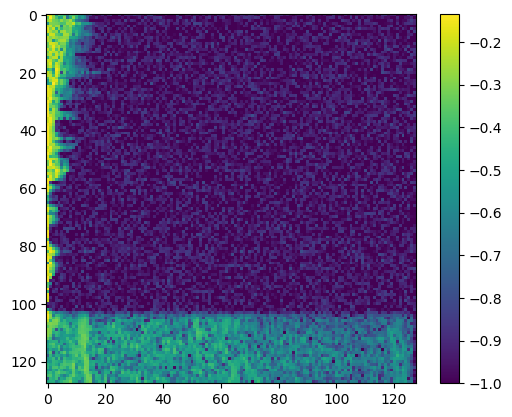

PyObject <matplotlib.colorbar.Colorbar object at 0x7f27cde69d30>

In [23]:
i += 1
imshow(a[i, :, :, 3])
colorbar()

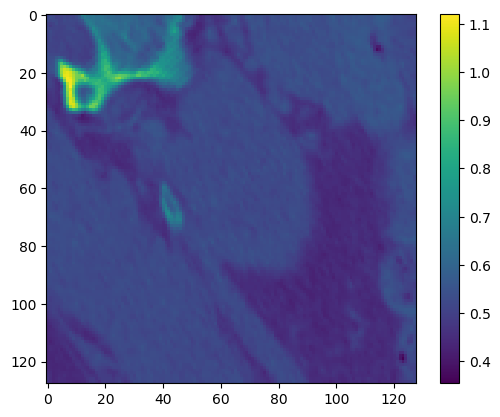

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8dfca45828>

In [233]:
imshow(tdata[i, :, :,3])
colorbar()

In [216]:
distances = map(argmax(tdata .> .2; dims=3)) do elem
    return elem[3]
end

536×128×1×4 Array{Int64,4}:
[:, :, 1, 1] =
  1   1   1   1   1   1   1   1   1  …   1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1  …   1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
 21  21  21  20  20  20  20  20  20  …   5   5   5   4   4   4   4   4   4
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   

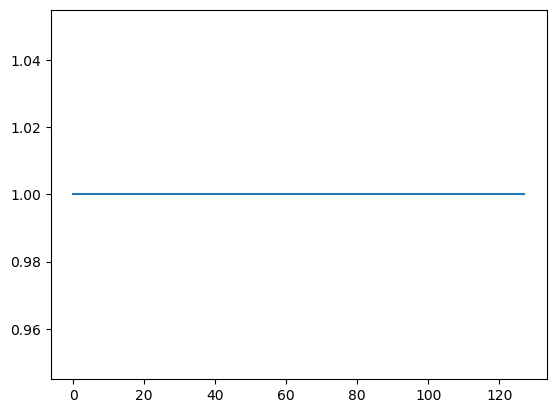

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e0d542470>

In [217]:
plot(distances[39, :, 1, 3])

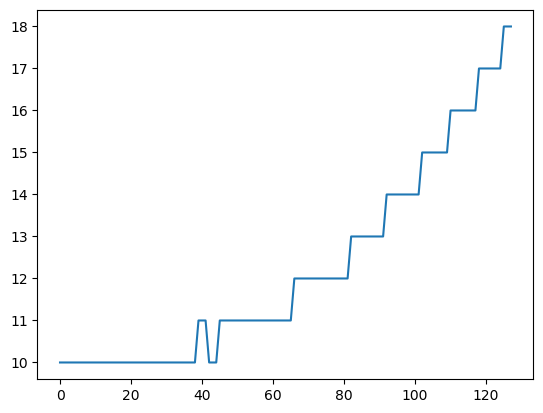

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e1b9395c0>

In [210]:
plot(distances[39, :, 1, 3])

In [218]:
distances2 = sort(distances[:])

274432-element Array{Int64,1}:
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   ⋮
 122
 123
 123
 124
 124
 125
 125
 126
 126
 127
 128
 128

In [219]:
distances2[Int64(round(.9 * length(distances2)))]

1

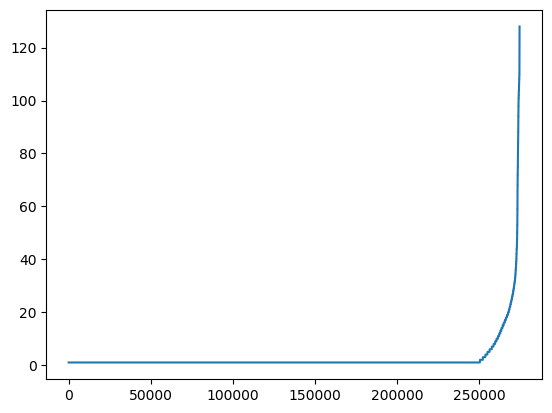

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e0d51d6a0>

In [220]:
plt.plot(distances2)

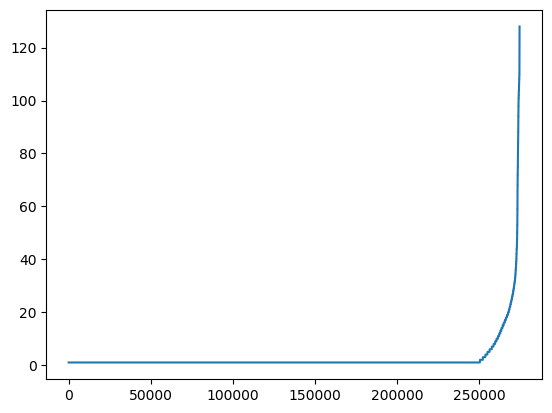

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e0d478dd8>

In [221]:
plt.plot(distances2)

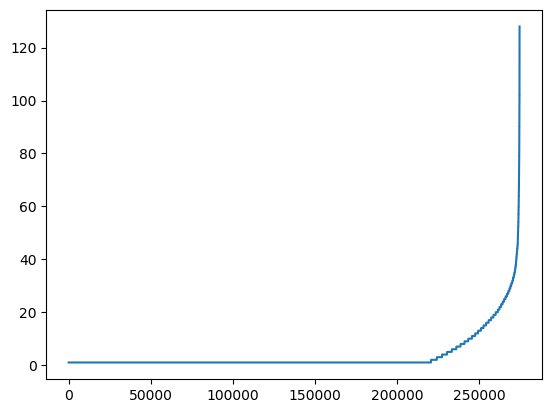

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e220c6748>

In [197]:
plt.plot(distances2)